<a href="https://colab.research.google.com/github/ClaudeLewisMbua/Data-Analysis/blob/main/Warren_Buffett_US_Stock_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

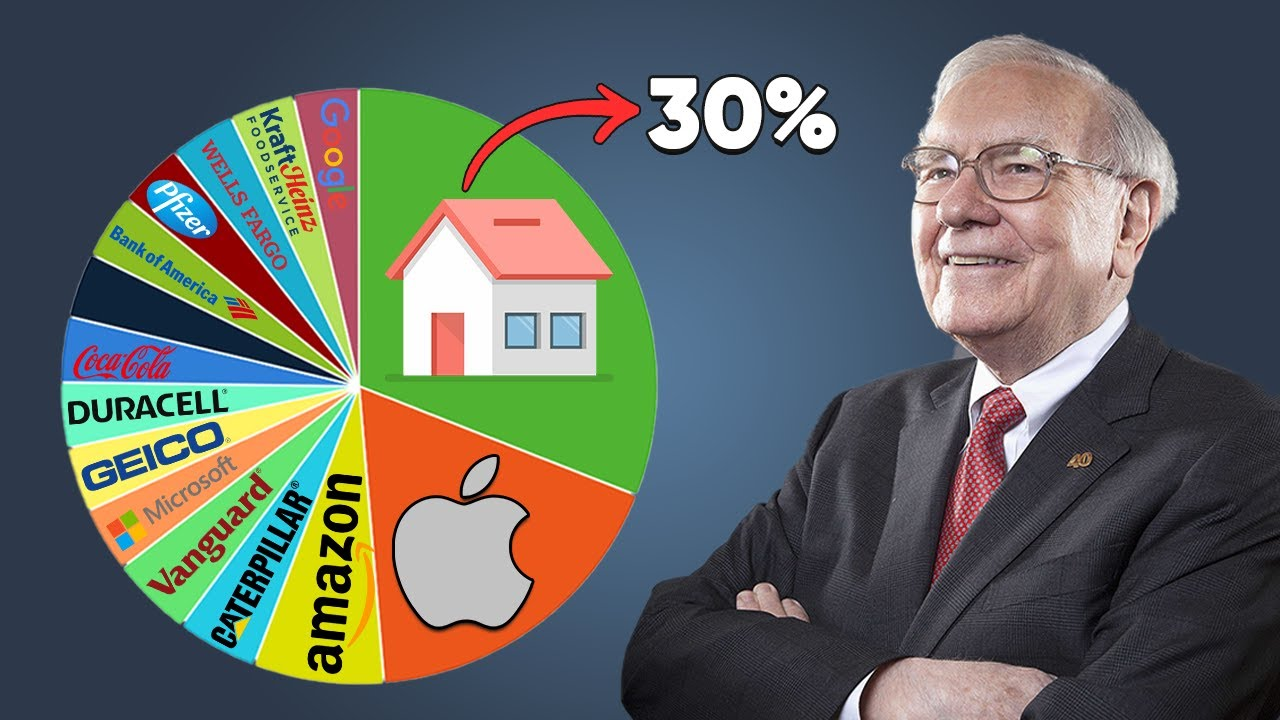

Source: [A Breakdown Of Warren Buffett’s 2022 Portfolio](https://www.youtube.com/watch?v=TE5SKG_aUqQ&ab_channel=ProactiveThinker)

# **Dataset**

**Context:** These are the publicly traded U.S. stocks owned by [Warren Buffett’s](https://en.wikipedia.org/wiki/Warren_Buffett) holding company [Berkshire Hathaway](https://en.wikipedia.org/wiki/Berkshire_Hathaway), as reported to the Securities and Exchange Commission's ([SEC](https://www.sec.gov/Archives/edgar/data/1067983/000095012320009058/xslForm13F_X01/960.xml)). He is considered one of the most successful investors in the world and has a net worth of US$78.9 billion as of August 2020, making him the world's seventh-wealthiest person.

The SEC [Form 13F](https://www.investopedia.com/terms/f/form-13f.asp) is a quarterly report that is required to be filed by all institutional investment managers with at least $100 million in assets under management. It discloses their equity holdings and can provide some insights into what the smart money is doing in the market.

After obtaining the list of companies in which Berkshire Hathaway invests, we proceeded to search the historical data of each company on the National Association of Securities Dealers Automated Quotations ([NASDAQ](https://www.nasdaq.com/)).

**Content:** There are 49 files in csv format, composed as follows:
* 45 files contain the U.S. stocks owned by Berkshire Hathaway.
* 2 files contain the historical data from Berkshire Hathaway. Class A stock (BRK-A) and Class B stock (BRK-B).
* 1 file contain the list of all the companies with additional information.
* 1 file contain the SEC Form 13F.

**Column Description:** Every company file has the same structure with the same columns:
* Date: It is the date on which the prices were recorded.
* Close/Last: Is the last price at which a stock trades during a regular trading session.
* Volume: Is the number of shares that changed hands during a given day.
* Open: Is the price at which a stock started trading when the opening bell rang.
* High: Is the highest price at which a stock traded during the course of the trading day.
* Low: Is the lowest price at which a stock traded during the course of the trading day.
* Adj Close: The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.

The two other files have different columns names:

*Company List*

* Name: Name of the company.
* Symbol: Ticker symbol of the company.
* Holdings: Number of shares.
* Market Price: Current price at which a stock can be purchased or sold. (10/18/20)
* Value: (Holdings * Market Price).
* Stake: The amount of stocks an investor owns from a company.

*SEC Form 13F*

Name of Issuer, Title of Class, CUSIP Number, Market Value, Amount and Type of Security, Investment Discretion (Sole, Shared-Defined, Shared-Other), Other Managers, Voting Authority. Detail information of each column can be found in the SEC General Instructions [Form 13F](https://www.sec.gov/pdf/form13f.pdf) in page 5.


# **Inspiration:** 
Possible questions which could be answered are:

* Of the companies that make up the Berkshire Hathaway portfolio, which are the most profitable companies?
* On February 21, 2020, Berkshire Hathaway suffered a large drop in its share price, what was the reason for this large drop?
* The presidential elections in the United States will be soon, do you think this will affect a particular company in the Warren Buffett portfolio and if so, which would affect them more?

# **Project Goal**

The main goal here is to analyze the *companies* that make up Warren Buffett's portfolio; Analyze their *behaviors* over the past few years, as well as their behaviors during the COVID-19 Pandemic; Determine *new trends* that can help investors make more informed decisions.




# **Table of Content**

* Data preparation
* Exploratory data analysis
* Web scraping
* Financial charts
* Predictions and Conclusions

# **Neccessary Packages**

In [ ]:
# data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# web scraping
import requests
import bs4
import csv
import json 
import re
from io import StringIO

# **Data Preparation**

####**Load Data**
There are two ways to load the data: 
*   By simply reading the csv files
*   By using pandas dataerder which allows us to read stock information directly from the internet. In this case we will use Yahoo Finance.




**Check Features:** We start with the company list dataset

In [ ]:
company_list= pd.read_csv("/content/CompanyList.csv", sep = ';')

In [ ]:
company_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          46 non-null     object
 1   Symbol        46 non-null     object
 2   Holdings      46 non-null     object
 3   Market Price  46 non-null     object
 4   Value         46 non-null     object
 5   Stake         45 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [ ]:
company_list.head()

,Name,Symbol,Holdings,Market Price,Value,Stake
0,"Amazon.com, Inc.",AMZN,"533,3","$3,272.71","$1,745,336,243",0.1%
1,American Express Company,AXP,"151,610,700",$104.91,"$15,905,478,537",18.8%
2,Apple Inc.,AAPL,"1,003,466,264",$119.02,"$119,432,554,741",5.9%
3,Axalta Coating Systems Ltd,AXTA,"23,535,041",$25.64,"$603,438,451",10.0%
4,Bank of America Corp,BAC,"1,032,852,006",$24.24,"$25,036,332,625",11.9%


Let us look at the SEC Form 13F

In [ ]:
SEC_Form_13F = pd.read_excel("/content/SEC_Form_13F.xlsx", index_col=None, header=None)

In [ ]:
SEC_Form_13F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       139 non-null    object
 1   1       139 non-null    object
 2   2       139 non-null    object
 3   3       139 non-null    object
 4   4       139 non-null    object
 5   5       139 non-null    object
 6   6       139 non-null    object
 7   7       139 non-null    object
 8   8       139 non-null    object
 9   9       139 non-null    object
 10  10      139 non-null    object
dtypes: object(11)
memory usage: 12.1+ KB


In [ ]:
SEC_Form_13F.head()

,0,1,2,3,4,5,6,7,8,9,10
0,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH / PRN,INVESTMENT DISCRETION,MANAGER,SOLE,SHARED,NONE
1,AMAZON COM INC,COM,23135106,"1,157,325",419.5,SH,DFND,4,419.5,0,0
2,AMAZON COM INC,COM,23135106,313.954,113.8,SH,DFND,"4,8,11",113.8,0,0
3,AMERICAN EXPRESS CO,COM,25816109,185.844,"1,952,142",SH,DFND,4,"1,952,142",0,0
4,AMERICAN EXPRESS CO,COM,25816109,"1,639,858","17,225,400",SH,DFND,4.5,"17,225,400",0,0


In [ ]:
SEC_Form_13F[0][0],SEC_Form_13F[1][0],SEC_Form_13F[2][0],SEC_Form_13F[3][0],SEC_Form_13F[4][0],SEC_Form_13F[5][0],SEC_Form_13F[6][0],SEC_Form_13F[7][0],SEC_Form_13F[8][0],SEC_Form_13F[9][0],SEC_Form_13F[10][0]

('NAME OF ISSUER',
 'TITLE OF CLASS',
 'CUSIP',
 'VALUE (x$1000)',
 'SHRS OR PRN AMT',
 'SH / PRN',
 'INVESTMENT DISCRETION',
 'MANAGER',
 'SOLE',
 'SHARED',
 'NONE')

In [ ]:
new_SEC_Form_13F = pd.DataFrame()
new_SEC_Form_13F[SEC_Form_13F[0][0]] = list(SEC_Form_13F[0][1:])
new_SEC_Form_13F[SEC_Form_13F[1][0]] = list(SEC_Form_13F[1][1:])
new_SEC_Form_13F[SEC_Form_13F[2][0]] = list(SEC_Form_13F[2][1:])
new_SEC_Form_13F[SEC_Form_13F[3][0]] = list(SEC_Form_13F[3][1:])
new_SEC_Form_13F[SEC_Form_13F[4][0]] = list(SEC_Form_13F[4][1:])
new_SEC_Form_13F[SEC_Form_13F[5][0]] = list(SEC_Form_13F[5][1:])
new_SEC_Form_13F[SEC_Form_13F[6][0]] = list(SEC_Form_13F[6][1:])
new_SEC_Form_13F[SEC_Form_13F[7][0]] = list(SEC_Form_13F[7][1:])
new_SEC_Form_13F[SEC_Form_13F[8][0]] = list(SEC_Form_13F[8][1:])
new_SEC_Form_13F[SEC_Form_13F[9][0]] = list(SEC_Form_13F[9][1:])
new_SEC_Form_13F[SEC_Form_13F[10][0]] = list(SEC_Form_13F[10][1:])

In [ ]:
new_SEC_Form_13F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NAME OF ISSUER         138 non-null    object
 1   TITLE OF CLASS         138 non-null    object
 2   CUSIP                  138 non-null    object
 3   VALUE (x$1000)         138 non-null    object
 4   SHRS OR PRN AMT        138 non-null    object
 5   SH / PRN               138 non-null    object
 6   INVESTMENT DISCRETION  138 non-null    object
 7   MANAGER                138 non-null    object
 8   SOLE                   138 non-null    object
 9   SHARED                 138 non-null    int64 
 10  NONE                   138 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 12.0+ KB


In [ ]:
new_SEC_Form_13F.head()

,NAME OF ISSUER,TITLE OF CLASS,CUSIP,VALUE (x$1000),SHRS OR PRN AMT,SH / PRN,INVESTMENT DISCRETION,MANAGER,SOLE,SHARED,NONE
0,AMAZON COM INC,COM,23135106,"1,157,325",419.5,SH,DFND,4,419.5,0,0
1,AMAZON COM INC,COM,23135106,313.954,113.8,SH,DFND,"4,8,11",113.8,0,0
2,AMERICAN EXPRESS CO,COM,25816109,185.844,"1,952,142",SH,DFND,4,"1,952,142",0,0
3,AMERICAN EXPRESS CO,COM,25816109,"1,639,858","17,225,400",SH,DFND,4.5,"17,225,400",0,0
4,AMERICAN EXPRESS CO,COM,25816109,79.952,839.832,SH,DFND,4.7,839.832,0,0


In [ ]:
new_SEC_Form_13F.to_csv("/content/new_SEC_Form_13F.csv", index = False) #We save our new constructed csv file

Now let's look at a company: Amazon for example

In [ ]:
AMZN = pd.read_csv("/content/AMZN.csv")

In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3498 non-null   object 
 1   High       3498 non-null   float64
 2   Low        3498 non-null   float64
 3   Open       3498 non-null   float64
 4   Close      3498 non-null   float64
 5   Volume     3498 non-null   int64  
 6   Adj Close  3498 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 191.4+ KB


In [ ]:
AMZN.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-01-03,39.060001,38.049999,38.680000,38.700001,12405100,38.700001
1,2007-01-04,39.139999,38.259998,38.590000,38.900002,6318400,38.900002
2,2007-01-05,38.790001,37.599998,38.720001,38.369999,6619700,38.369999
3,2007-01-08,38.310001,37.169998,38.220001,37.500000,6783000,37.500000
4,2007-01-09,38.060001,37.340000,37.599998,37.779999,5703000,37.779999


# **Cleaning the Dataframes**
Getting back to our company list *company_list*, let us clean the DataFrame, by removing spaces, % and $ sign from it.

In [ ]:
company_list.head()

,Name,Symbol,Holdings,Market Price,Value,Stake
0,"Amazon.com, Inc.",AMZN,"533,3","$3,272.71","$1,745,336,243",0.1%
1,American Express Company,AXP,"151,610,700",$104.91,"$15,905,478,537",18.8%
2,Apple Inc.,AAPL,"1,003,466,264",$119.02,"$119,432,554,741",5.9%
3,Axalta Coating Systems Ltd,AXTA,"23,535,041",$25.64,"$603,438,451",10.0%
4,Bank of America Corp,BAC,"1,032,852,006",$24.24,"$25,036,332,625",11.9%


In [ ]:
# Removing $ sign and spaces 
cols = ['Holdings', 'Market Price', 'Value', 'Stake']

# Company List (Table)
company_list[cols] = company_list[cols].replace({'\$': '', ' ': '', '%': '', ',': ''}, regex=True)

In [ ]:
#We remove the last row of the company_list dataframe
company_list.drop(company_list.tail(1).index,inplace=True)


In [ ]:
#Finally, convert the numbers, which are as strings, to floats.
for x in cols:
    company_list[x] = company_list[x].astype(float)

In [ ]:
company_list.head() #let is look at our new cleaned dataframe

,Name,Symbol,Holdings,Market Price,Value,Stake
0,"Amazon.com, Inc.",AMZN,5.333000e+03,3272.71,1.745336e+09,0.1
1,American Express Company,AXP,1.516107e+08,104.91,1.590548e+10,18.8
2,Apple Inc.,AAPL,1.003466e+09,119.02,1.194326e+11,5.9
3,Axalta Coating Systems Ltd,AXTA,2.353504e+07,25.64,6.034385e+08,10.0
4,Bank of America Corp,BAC,1.032852e+09,24.24,2.503633e+10,11.9


### **We now concatenate the Stock Dataframes**

We are going to concatenate the stock dataframes together to a single data frame called *company_stocks*. This is so we can have better control over the dataframes and analyze them together.

We will also create an aditional dataframe called *berkshire_hathaway* with Class A stock (BRK-A) and Class B stock (BRK-B).

Let's create a list of the ticker symbols (as strings) in alphabetical order.

We need to load all the comapnies csv files

In [ ]:
AMZN = pd.read_csv("/content/AMZN.csv")
AXP = pd.read_csv("/content/AXP.csv")
AAPL = pd.read_csv("/content/AAPL.csv")
AXTA = pd.read_csv("/content/AXTA.csv")
BAC = pd.read_csv("/content/BAC.csv")
BK = pd.read_csv("/content/BK.csv")
GOLD = pd.read_csv("/content/GOLD.csv")
BIIB = pd.read_csv("/content/BIIB.csv")
CHTR = pd.read_csv("/content/CHTR.csv")
KO = pd.read_csv("/content/KO.csv")
COST = pd.read_csv("/content/COST.csv")
DVA = pd.read_csv("/content/DVA.csv")
GM = pd.read_csv("/content/GM.csv")
GL = pd.read_csv("/content/GL.csv")
JNJ = pd.read_csv("/content/JNJ.csv")
JPM = pd.read_csv("/content/JPM.csv")
KHC = pd.read_csv("/content/KHC.csv")
KR = pd.read_csv("/content/KR.csv")
LBTYA = pd.read_csv("/content/LBTYA.csv")
LBTYK = pd.read_csv("/content/LBTYK.csv")
LILA  = pd.read_csv("/content/LILA.csv")
LILAK = pd.read_csv("/content/LILAK.csv")
LSXMA = pd.read_csv("/content/LSXMA.csv")
LSXMK = pd.read_csv("/content/LSXMK.csv")
MTB = pd.read_csv("/content/MTB.csv")
MA = pd.read_csv("/content/MA.csv")
MDLZ = pd.read_csv("/content/MDLZ.csv")
MCO = pd.read_csv("/content/MCO.csv")
PNC = pd.read_csv("/content/PNC.csv")
PG = pd.read_csv("/content/PG.csv")
RH = pd.read_csv("/content/RH.csv")
SIRI = pd.read_csv("/content/SIRI.csv")
SNOW = pd.read_csv("/content/SNOW.csv")
SPY = pd.read_csv("/content/SPY.csv")
STNE = pd.read_csv("/content/STNE.csv")
STOR = pd.read_csv("/content/STOR.csv")
SU = pd.read_csv("/content/SU.csv")
SYF = pd.read_csv("/content/SYF.csv")
TEVA = pd.read_csv("/content/TEVA.csv")
USB = pd.read_csv("/content/USB.csv")
UPS = pd.read_csv("/content/UPS.csv")
VOO = pd.read_csv("/content/VOO.csv")
VRSN = pd.read_csv("/content/VRSN.csv")
V = pd.read_csv("/content/V.csv")
WFC = pd.read_csv("/content/WFC.csv")
BRKA = pd.read_csv("/content/BRKA.csv")
BRKB = pd.read_csv("/content/BRKB.csv")
GSPC = pd.read_csv("/content/GSPC.csv")

In [ ]:
company_list_stocks = [AMZN,AXP,AAPL,AXTA,BAC,BK,GOLD,BIIB,CHTR,KO,COST,DVA,GM,GL,JNJ,JPM,KHC,KR,LBTYA,LBTYK,LILA,LILAK,LSXMA,
                       LSXMK,MTB,MA,MDLZ,MCO,PNC,PG,RH,SIRI,SNOW,SPY,STNE,STOR,SU,SYF,TEVA,USB,UPS,VOO,VRSN,V,WFC]

tickers1 = ['AMZN','AXP','AAPL','AXTA','BAC','BK','GOLD','BIIB','CHTR','KO','COST','DVA','GM','GL','JNJ','JPM','KHC','KR',
           'LBTYA','LBTYK','LILA','LILAK','LSXMA','LSXMK','MTB','MA','MDLZ','MCO','PNC','PG','RH','SIRI','SNOW','SPY','STNE',
           'STOR','SU','SYF','TEVA','USB','UPS','VOO','VRSN','V','WFC']

tickers2 = ['BRKA','BRKB']

company_stocks = pd.concat(company_list_stocks, axis=1, keys=tickers1)

berkshire_hathaway = pd.concat([BRKA, BRKB], axis=1, keys=tickers2)

# Set the column name levels:
company_stocks.columns.names = ['Stock Ticker','Stock Info']
company_stocks.head()

Stock Ticker        AMZN                                              \
Stock Info          Date       High        Low       Open      Close   
0             2007-01-03  39.060001  38.049999  38.680000  38.700001   
1             2007-01-04  39.139999  38.259998  38.590000  38.900002   
2             2007-01-05  38.790001  37.599998  38.720001  38.369999   
3             2007-01-08  38.310001  37.169998  38.220001  37.500000   
4             2007-01-09  38.060001  37.340000  37.599998  37.779999   

Stock Ticker                              AXP                        ...  \
Stock Info      Volume  Adj Close        Date       High        Low  ...   
0             12405100  38.700001  2007-01-03  61.900002  60.049999  ...   
1              6318400  38.900002  2007-01-04  60.570000  59.790001  ...   
2              6619700  38.369999  2007-01-05  59.869999  58.900002  ...   
3              6783000  37.500000  2007-01-08  59.759998  58.349998  ...   
4              5703000  37.779999  2007-01-09  59.950001  59.000000  ...   

Stock Ticker        V                                 WFC             \
Stock Info      Close       Volume  Adj Close        Date       High   
0             14.1250  708486000.0  12.901475  2007-01-03  36.009998   
1             16.0875  198985200.0  14.693976  2007-01-04  36.020000   
2             14.9325  149566400.0  13.639026  2007-01-05  35.830002   
3             15.8125   87092000.0  14.442798  2007-01-08  35.889999   
4             15.9900   43111600.0  14.604924  2007-01-09  35.849998   

Stock Ticker                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
0             35.369999  35.930000  35.740002  12447600.0  23.962498  
1             35.540001  35.740002  35.799999  11060500.0  24.002729  
2             35.509998  35.790001  35.599998  10329200.0  23.868629  
3             35.389999  35.610001  35.500000  11650400.0  23.801577  
4             35.480000  35.580002  35.590000  10159800.0  23.861921  

[5 rows x 315 columns]

In [ ]:
company_stocks.to_csv("/content/company_stocks.csv", index = False) #We save our new constructed csv file

In [ ]:
berkshire_hathaway.to_csv("/content/berkshire_hathaway_Stock.csv", index = False) #We save our new constructed csv file

In [ ]:
berkshire_hathaway.columns.names = ['Stock Ticker','Stock Info']
%connect_info.head()

Stock Ticker        BRKA                                                   \
Stock Info          Date    High     Low    Open   Close Volume Adj Close   
0             2007-01-03  110600  109000  110400  109000  67000    109000   
1             2007-01-04  109400  108250  109400  108850  46000    108850   
2             2007-01-05  108800  107000  108800  107200  42000    107200   
3             2007-01-08  107800  107300  107600  107500  34000    107500   
4             2007-01-09  109600  107510  107510  109350  40000    109350   

Stock Ticker        BRKB                                              \
Stock Info          Date       High        Low       Open      Close   
0             2007-01-03  73.720001  72.599998  73.559998  72.860001   
1             2007-01-04  72.940002  72.059998  72.860001  72.199997   
2             2007-01-05  72.660004  71.260002  72.660004  71.559998   
3             2007-01-08  71.900002  71.500000  71.820000  71.720001   
4             2007-01-09  73.040001  71.660004  71.720001  73.000000   

Stock Ticker                        
Stock Info       Volume  Adj Close  
0             1385000.0  72.860001  
1             1070000.0  72.199997  
2              930000.0  71.559998  
3              760000.0  71.720001  
4              610000.0  73.000000

# **Exploratory Data Analysis**

[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyze data sets to summarize their main characteristics, often with visual methods. In this case we are going to visualize and analyze the historical data of these stocks and try to find relevant information.

We will also analyze the stock portfolio to see which are the most relevant companies and which are the most profitable.

***To do:*** check out the documentation on [Multi-Level Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) and [Using .xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html), since we will be using it a lot.

# **Berkshire Hathaway Portfolio**

In [ ]:
company_list.head()

,Name,Symbol,Holdings,Market Price,Value,Stake
0,"Amazon.com, Inc.",AMZN,5.333000e+03,3272.71,1.745336e+09,0.1
1,American Express Company,AXP,1.516107e+08,104.91,1.590548e+10,18.8
2,Apple Inc.,AAPL,1.003466e+09,119.02,1.194326e+11,5.9
3,Axalta Coating Systems Ltd,AXTA,2.353504e+07,25.64,6.034385e+08,10.0
4,Bank of America Corp,BAC,1.032852e+09,24.24,2.503633e+10,11.9


In [ ]:
import plotly.express as px
#df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(company_list, values='Holdings', names='Symbol',
             title='Holdings per Company of Warren Buffett Portfolio',
             hover_data=['Name'], labels={'Name':'Company Name'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

In [ ]:
fig = px.bar(company_list, x="Value", y="Symbol", orientation='h', title='Value per Company of Warren Buffett Portfolio',
             hover_data=['Name'], labels={'Name':'Company Name'})
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show(renderer="colab")

Top 5

In [ ]:
percentage_value=pd.DataFrame()
percentage_value["Symbol"] = company_list.Symbol
percentage_value["percent"] = round((company_list['Value'] / company_list['Value'].sum()) * 100,3)
percentage_value=percentage_value.sort_values(by=['percent'],ascending=False)
percentage_value.head()

,Symbol,percent
2,AAPL,49.290
4,BAC,10.333
9,KO,8.259
1,AXP,6.564
16,KHC,4.322


In [ ]:
fig = px.bar(company_list, x="Stake", y="Symbol", orientation='h', title='Stakes per Company of Warren Buffett Portfolio',
             hover_data=['Name'], labels={'Name':'Company Name'})
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show(renderer="colab")

**Top 5**

In [ ]:
stake=pd.DataFrame()
stake["Symbol"] = company_list.Symbol
stake["percent"] = round(company_list['Stake'],3)
stake=stake.sort_values(by=['percent'],ascending=False)
stake.head()

,Symbol,percent
11,DVA,28.6
16,KHC,26.6
1,AXP,18.8
23,LSXMK,18.6
22,LSXMA,14.7


# **New Return Dataframes**

**Daily Returns DataFrame:**

Here, we are going to create a new empty DataFrame called returns. This dataframe will contain the returns for each stock.



Returns are typically defined by:

 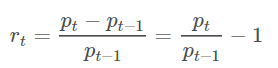

We can use pandas *pct_change()* method on the *Close column* to create a column representing this *return value*. Then we can create a for loop and for each **Stock Ticker** creates a returns column and set's it as a column in the returns DataFrame.

Our first value has [NaN](https://en.wikipedia.org/wiki/NaN) because you can not get a percent return on the very first day because there is nothing in the past to compare it to.

In [ ]:
returns = pd.DataFrame() # we declare an empty dataframe

for tick in tickers1:
    returns[tick + ' Return'] = company_stocks[tick]['Close'].pct_change()
    
returns['BRKA Return'] = BRKA['Close'].pct_change()
returns['BRKB Return'] = BRKB['Close'].pct_change()
returns['GSPC Return'] = GSPC['Close'].pct_change()

**Monthly Returns DataFrame:**

In [ ]:
company_stocks.head(2)

Stock Ticker        AMZN                                                    \
Stock Info          Date       High        Low   Open      Close    Volume   
0             2007-01-03  39.060001  38.049999  38.68  38.700001  12405100   
1             2007-01-04  39.139999  38.259998  38.59  38.900002   6318400   

Stock Ticker                    AXP                        ...        V  \
Stock Info    Adj Close        Date       High        Low  ...    Close   
0             38.700001  2007-01-03  61.900002  60.049999  ...  14.1250   
1             38.900002  2007-01-04  60.570000  59.790001  ...  16.0875   

Stock Ticker                                 WFC                        \
Stock Info         Volume  Adj Close        Date       High        Low   
0             708486000.0  12.901475  2007-01-03  36.009998  35.369999   
1             198985200.0  14.693976  2007-01-04  36.020000  35.540001   

Stock Ticker                                               
Stock Info         Open      Close      Volume  Adj Close  
0             35.930000  35.740002  12447600.0  23.962498  
1             35.740002  35.799999  11060500.0  24.002729  

[2 rows x 315 columns]

In [ ]:
monthly_returns = pd.DataFrame()

for tick in tickers1:
  company_stocks[tick]['Date'] = pd.to_datetime(company_stocks[tick]['Date'])
  company_stocks[tick] = company_stocks[tick].set_index("Date")
  monthly_returns[tick + ' Return'] = company_stocks[tick].resample('M', on ='Date')['Close'].ffill().pct_change()
    
monthly_returns['BRKA Return'] = BRKA['Close'].resample('M').ffill().pct_change()
monthly_returns['BRKB Return'] = BRKB['Close'].resample('M').ffill().pct_change()
monthly_returns['GSPC Return'] = GSPC['Close'].resample('M').ffill().pct_change()

ValueError: ignored

In [ ]:
monthly_returns = pd.DataFrame()

for tick in tickers1:
    monthly_returns[tick + ' Return'] = company_stocks[tick]['Close'].resample('M', on ='Date').ffill().pct_change()
    
monthly_returns['BRKA Return'] = BRKA['Close'].resample('M').ffill().pct_change()
monthly_returns['BRKB Return'] = BRKB['Close'].resample('M').ffill().pct_change()
monthly_returns['GSPC Return'] = GSPC['Close'].resample('M').ffill().pct_change()

KeyError: ignored

# **Acknowledgements**
This work is inspired from the Kaggle exercise [here](https://www.kaggle.com/code/tomasmantero/eda-warren-buffett-us-stock-companies/notebook), very well presented by [TOMAS MANTERO](https://www.kaggle.com/tomasmantero)
